In [12]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
def preprocess_images(root_folder):
    preprocessed_images = []
    for tile_folder in os.listdir(root_folder):
        tile_images_folder = os.path.join(root_folder, tile_folder, 'images')
        if os.path.isdir(tile_images_folder):
            for image_name in os.listdir(tile_images_folder):
                if image_name.endswith(".jpg"):
                    image_path = os.path.join(tile_images_folder, image_name)
                    image = cv2.imread(image_path)
                    image = cv2.resize(image, (256, 256))  # Resize image to 256x256
                    image = image.astype(np.float32) / 255.0  # Normalize pixel values between 0 and 1
                    preprocessed_images.append(image)
    return np.array(preprocessed_images)

In [14]:
def preprocess_masks(root_folder, vegetation_hex_code):
    preprocessed_masks = []
    for tile_folder in os.listdir(root_folder):
        tile_masks_folder = os.path.join(root_folder, tile_folder, 'masks')
        if os.path.isdir(tile_masks_folder):
            for mask_name in os.listdir(tile_masks_folder):
                if mask_name.endswith(".png"):
                    mask_path = os.path.join(tile_masks_folder, mask_name)
                    mask = cv2.imread(mask_path, cv2.IMREAD_COLOR)
                    mask = cv2.resize(mask, (256, 256))  # Resize mask to 256x256
                    
                    # Print RGB values of a sample pixel
                    sample_pixel = mask[0, 0]
                    #print("Sample pixel RGB:", sample_pixel)
                    
                    # Compare each pixel's RGB value with the vegetation hex code
                    vegetation_mask = np.all(mask == vegetation_hex_code, axis=-1).astype(np.uint8)
                    preprocessed_masks.append(vegetation_mask)
    return np.array(preprocessed_masks)


In [15]:
if __name__ == "__main__":
    root_folder = r'path_to\Data'
    vegetation_hex_code = np.array([246, 41, 132])  # Hex code for vegetation: #FEDD3A

    preprocessed_images = preprocess_images(root_folder)
    preprocessed_masks = preprocess_masks(root_folder, vegetation_hex_code)

    print("Preprocessed images shape:", preprocessed_images.shape)
    print("Preprocessed masks shape:", preprocessed_masks.shape)

Preprocessed images shape: (72, 256, 256, 3)
Preprocessed masks shape: (72, 256, 256)


In [16]:
print(len(preprocessed_images))

72


# Save preprocessed images and masks

In [17]:
np.save('preprocessed_images.npy', preprocessed_images)
np.save('preprocessed_masks.npy', preprocessed_masks)

# Assuming preprocessed_masks contains the preprocessed masks

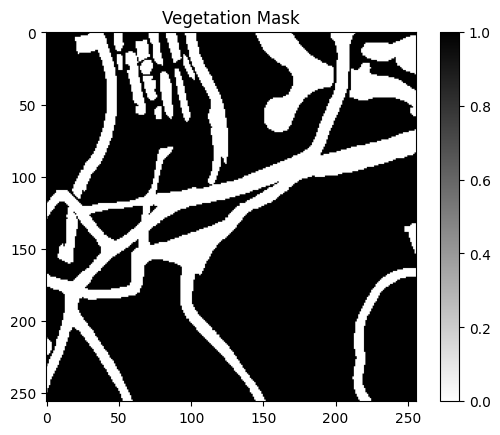

In [18]:
sample_mask = preprocessed_masks[0]  # Selecting the first mask as a sample

plt.imshow(sample_mask, cmap='binary')
plt.title('Vegetation Mask')
plt.colorbar()
plt.show()
